In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv',header=0)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
import time

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [6]:
X = df.drop(['Survived','Name','Ticket'], 1)
y = df['Survived']

In [7]:
X['Sex'] = X.Sex.map({'male':1, 'female':0})

In [8]:
X['Embarked'] = X.Embarked.map({'S':0, 'C':1,'Q':2})

In [9]:
X['Embarked'].unique()

array([  0.,   1.,   2.,  nan])

In [10]:
X['Cabin']=X['Cabin'].str[0]

In [11]:
X['Cabin'] = X.Cabin.map({'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})

In [12]:
X=X.fillna(100)

In [13]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,100.0,0.0
1,2,1,0,38.0,1,0,71.2833,2.0,1.0
2,3,3,0,26.0,0,0,7.9250,100.0,0.0
3,4,1,0,35.0,1,0,53.1000,2.0,0.0
4,5,3,1,35.0,0,0,8.0500,100.0,0.0
5,6,3,1,100.0,0,0,8.4583,100.0,2.0
6,7,1,1,54.0,0,0,51.8625,4.0,0.0
7,8,3,1,2.0,3,1,21.0750,100.0,0.0
8,9,3,0,27.0,0,2,11.1333,100.0,0.0
9,10,2,0,14.0,1,0,30.0708,100.0,1.0


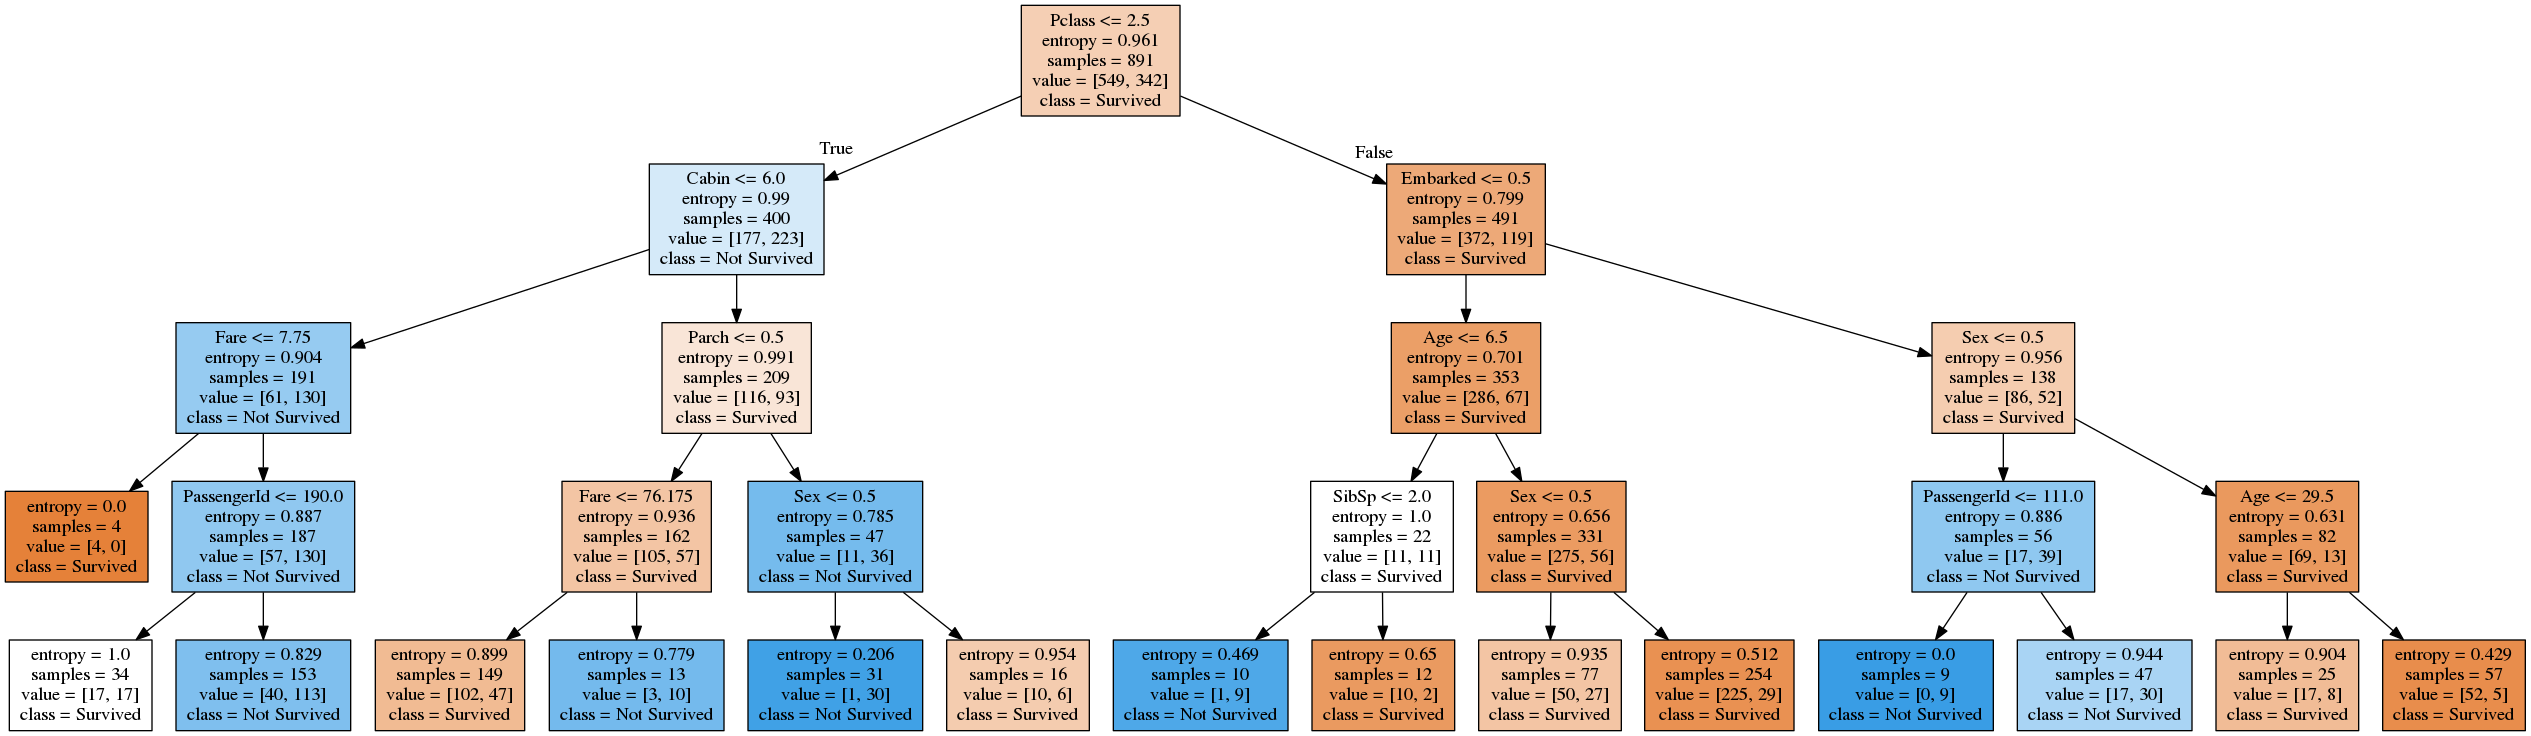

In [14]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz


decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=4,
    random_state = 1234
)
tic()
decision_tree.fit(X, y)


dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Survived', 'Not Survived'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
from sklearn.model_selection import cross_val_score
scoretree = cross_val_score(decision_tree, X, y, cv=10)
scoretree

array([ 0.81111111,  0.7       ,  0.71910112,  0.71910112,  0.73033708,
        0.75280899,  0.79775281,  0.76404494,  0.82022472,  0.77272727])

In [19]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(random_state = 1234)
scorerf = cross_val_score(rfc, X, y, cv=10)
scorerf

array([ 0.77777778,  0.73333333,  0.74157303,  0.82022472,  0.8988764 ,
        0.85393258,  0.80898876,  0.74157303,  0.85393258,  0.82954545])